In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', 25)

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


In [2]:
text = "I am happy today. I feel sad today."

In [3]:
from textblob import TextBlob
blob = TextBlob(text)
blob

TextBlob("I am happy today. I feel sad today.")

In [4]:
blob.sentences



[Sentence("I am happy today."), Sentence("I feel sad today.")]

In [5]:
blob.sentences[0].sentiment


Sentiment(polarity=0.8, subjectivity=1.0)

In [6]:
blob.sentences[1].sentiment


Sentiment(polarity=-0.5, subjectivity=1.0)

In [7]:
blob.sentiment


Sentiment(polarity=0.15000000000000002, subjectivity=1.0)

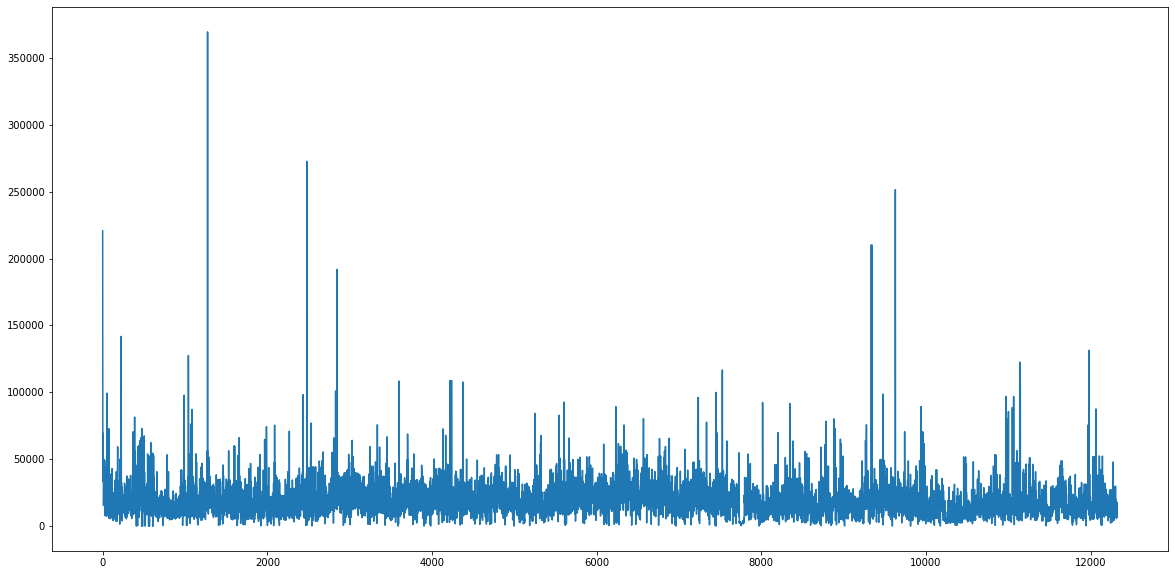

In [8]:
df = pd.read_csv("tweet.csv")

retweet = df['retweet_count']

favorite = df['favorite_count']

retweet2 = df['retweet_count'] * 2 

# df['favorite_count2'] = df['favorite_count2']

time = df["created_at"]



plt.figure(figsize=(20,10)) 

plt.plot(retweet)

plt.show()



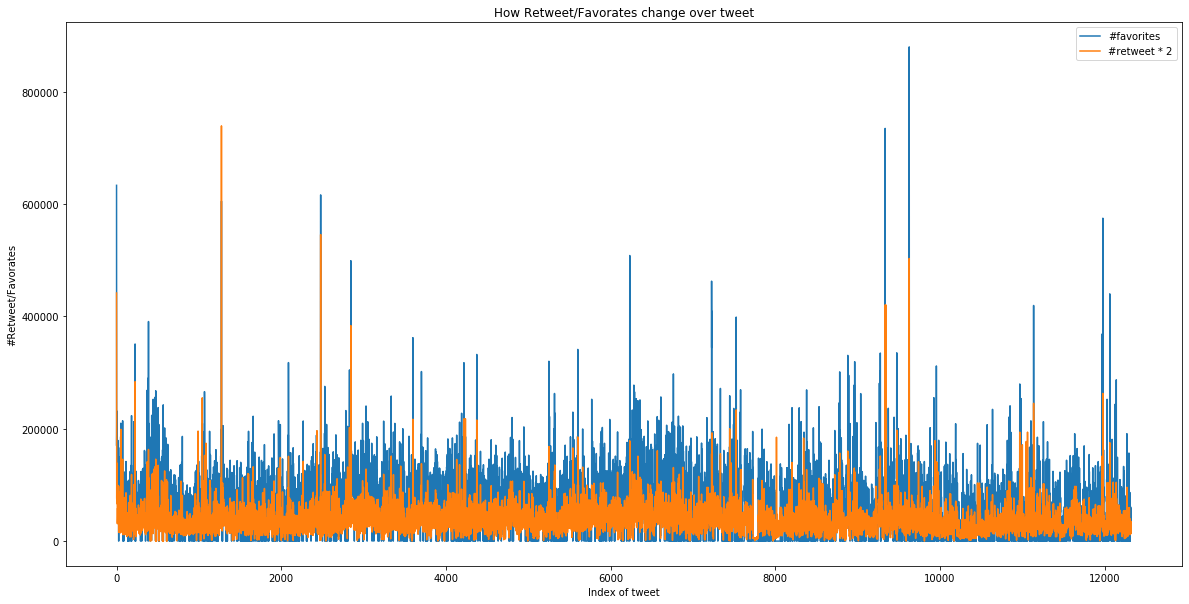

In [52]:
plt.figure(figsize=(20,10)) 

plt.plot(favorite, label = '#favorites')
plt.plot(retweet2, label = '#retweet * 2')

plt.xlabel('Index of tweet')
plt.ylabel('#Retweet/Favorates')
plt.title('How Retweet/Favorates change over tweet')
plt.legend()

plt.show()

In [49]:
desc = retweet.describe()
desc2 = favorite.describe()
print(desc)
print(desc2)

count     12323.000000
mean      18573.566339
std       12417.851632
min           2.000000
25%       11316.000000
50%       16690.000000
75%       23166.000000
max      369530.000000
Name: retweet_count, dtype: float64
count     12323.000000
mean      67049.472125
std       52784.541328
min           0.000000
25%       28964.500000
50%       69022.000000
75%       96076.500000
max      879647.000000
Name: favorite_count, dtype: float64


In [11]:

df.dtypes


source            object
text              object
created_at        object
retweet_count      int64
favorite_count     int64
is_retweet        object
id_str             int64
dtype: object

In [12]:
df['string'] = df['text'].astype(str)

df

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,string
0,Twitter for Android,Such a beautiful and important evening! The fo...,11-09-2016 11:36:58,220796,633253,False,796315640307060738,Such a beautiful and important evening! The fo...
1,Twitter for iPhone,Happy 241st birthday to the U.S. Marine Corps!...,11-10-2016 19:31:27,45576,169729,False,796797436752707585,Happy 241st birthday to the U.S. Marine Corps!...
2,Twitter for Android,A fantastic day in D.C. Met with President Oba...,11-11-2016 02:10:46,37788,192638,False,796897928048766976,A fantastic day in D.C. Met with President Oba...
3,Twitter for Android,Just had a very open and successful presidenti...,11-11-2016 02:19:44,69498,231526,False,796900183955095552,Just had a very open and successful presidenti...
4,Twitter for Android,Love the fact that the small groups of protest...,11-11-2016 11:14:20,55954,221718,False,797034721075228672,Love the fact that the small groups of protest...
...,...,...,...,...,...,...,...,...
12318,Twitter for iPhone,It was just explained to me that for next week...,11-07-2019 15:16:15,17716,59582,False,1192460764235419654,It was just explained to me that for next week...
12319,Twitter for iPhone,THANK YOU! #MAGA https://t.co/e6dZshYFMV,11-07-2019 15:18:53,6548,26575,False,1192461425358385154,THANK YOU! #MAGA https://t.co/e6dZshYFMV
12320,Twitter for iPhone,The Amazon Washington Post and three lowlife r...,11-07-2019 15:27:57,12082,38697,False,1192463709400117250,The Amazon Washington Post and three lowlife r...
12321,Twitter for iPhone,The Radical Left Dems and LameStream Media are...,11-07-2019 15:41:53,8318,29340,False,1192467215360102401,The Radical Left Dems and LameStream Media are...


In [13]:
polarity = []

subjectivity = []

def find_emotion(i):
    s = df.iloc[i, 1]
    
    t = TextBlob(s)

    return (t.sentiment)

for i in range (12323):
    temp = find_emotion(i)
    
    polarity.append(temp[0])

    subjectivity.append(temp[1])
    

In [14]:
len(polarity)

12323

In [15]:

df['polarity'] = polarity
df['subjectivity'] = subjectivity

df

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,string,polarity,subjectivity
0,Twitter for Android,Such a beautiful and important evening! The fo...,11-09-2016 11:36:58,220796,633253,False,796315640307060738,Such a beautiful and important evening! The fo...,0.450000,0.833333
1,Twitter for iPhone,Happy 241st birthday to the U.S. Marine Corps!...,11-10-2016 19:31:27,45576,169729,False,796797436752707585,Happy 241st birthday to the U.S. Marine Corps!...,1.000000,1.000000
2,Twitter for Android,A fantastic day in D.C. Met with President Oba...,11-11-2016 02:10:46,37788,192638,False,796897928048766976,A fantastic day in D.C. Met with President Oba...,0.580000,0.676667
3,Twitter for Android,Just had a very open and successful presidenti...,11-11-2016 02:19:44,69498,231526,False,796900183955095552,Just had a very open and successful presidenti...,0.009375,0.675000
4,Twitter for Android,Love the fact that the small groups of protest...,11-11-2016 11:14:20,55954,221718,False,797034721075228672,Love the fact that the small groups of protest...,0.410000,0.563333
...,...,...,...,...,...,...,...,...,...,...
12318,Twitter for iPhone,It was just explained to me that for next week...,11-07-2019 15:16:15,17716,59582,False,1192460764235419654,It was just explained to me that for next week...,-0.140625,0.458333
12319,Twitter for iPhone,THANK YOU! #MAGA https://t.co/e6dZshYFMV,11-07-2019 15:18:53,6548,26575,False,1192461425358385154,THANK YOU! #MAGA https://t.co/e6dZshYFMV,0.000000,0.000000
12320,Twitter for iPhone,The Amazon Washington Post and three lowlife r...,11-07-2019 15:27:57,12082,38697,False,1192463709400117250,The Amazon Washington Post and three lowlife r...,-0.116071,0.750000
12321,Twitter for iPhone,The Radical Left Dems and LameStream Media are...,11-07-2019 15:41:53,8318,29340,False,1192467215360102401,The Radical Left Dems and LameStream Media are...,0.169697,0.349053


In [16]:
df['polarity'].describe()

count    12323.000000
mean         0.146412
std          0.335847
min         -1.000000
25%          0.000000
50%          0.058333
75%          0.326116
max          1.000000
Name: polarity, dtype: float64

/Users/huangruijie/anaconda3/envs/tfcs109a/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


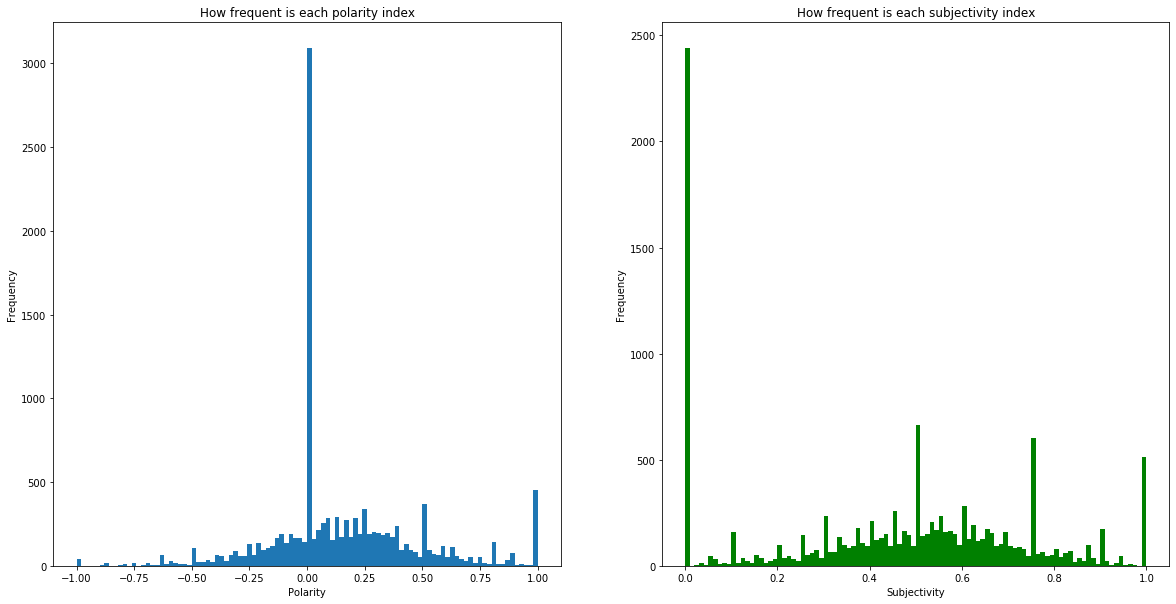

In [68]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].hist(polarity, 100)
axes[0].set_xlabel('Polarity')
axes[0].set_ylabel('Frequency')
axes[0].set_title('How frequent is each polarity index')

axes[1].hist(subjectivity, 100, color = 'green')
axes[1].set_xlabel('Subjectivity')
axes[1].set_ylabel('Frequency')
axes[1].set_title('How frequent is each subjectivity index')

fig.show()

In [18]:
df['subjectivity'].describe()

count    12323.000000
mean         0.442886
std          0.293801
min          0.000000
25%          0.214286
50%          0.495833
75%          0.650000
max          1.000000
Name: subjectivity, dtype: float64

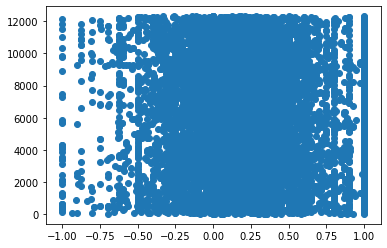

In [20]:

# plt.figure(figsize=(20,10)) 

plt.scatter(df['polarity'], range(len(polarity)))


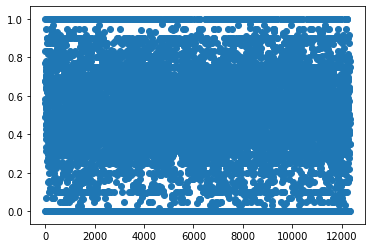

In [21]:

# plt.figure(figsize=(20,10)) 

# plt.plot(df['subjectivity'])

plt.scatter(range(len(subjectivity)), df['subjectivity'])


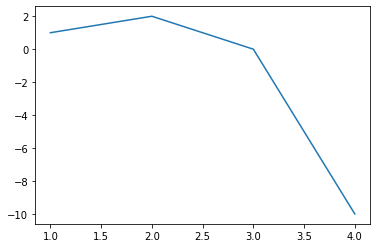

In [22]:
plt.plot([1,2, 3, 4], [1,2, 0, -10])


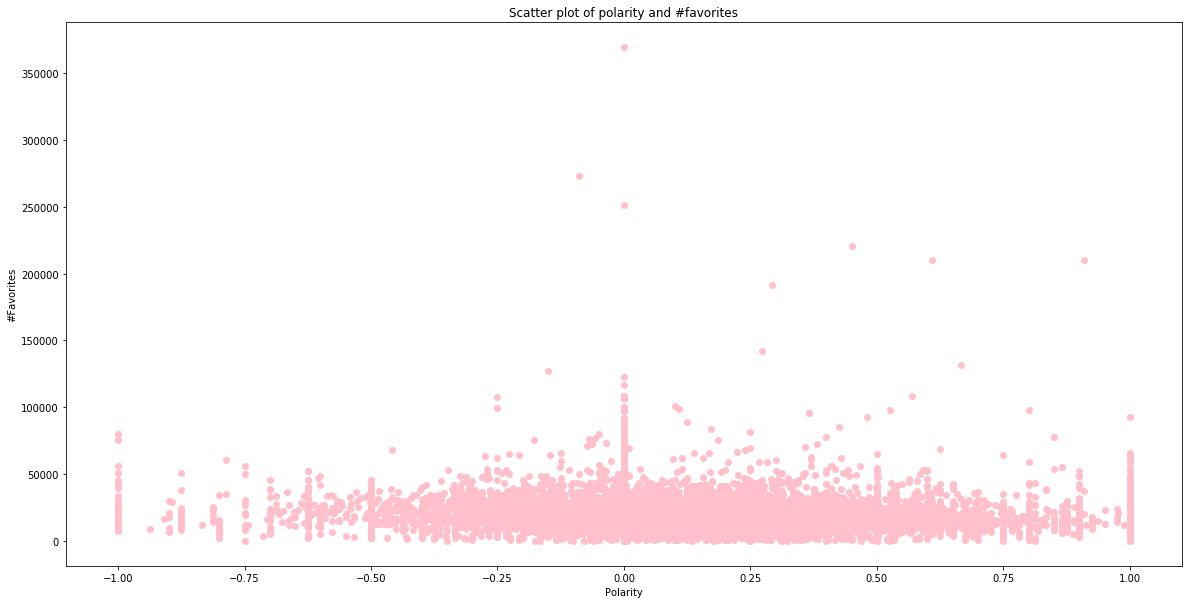

In [74]:

plt.figure(figsize=(20,10)) 

plt.scatter(df['polarity'], df['retweet_count'], color='pink')

plt.xlabel('Polarity')
plt.ylabel('#Favorites')
plt.title('Scatter plot of polarity and #favorites')

plt.show()


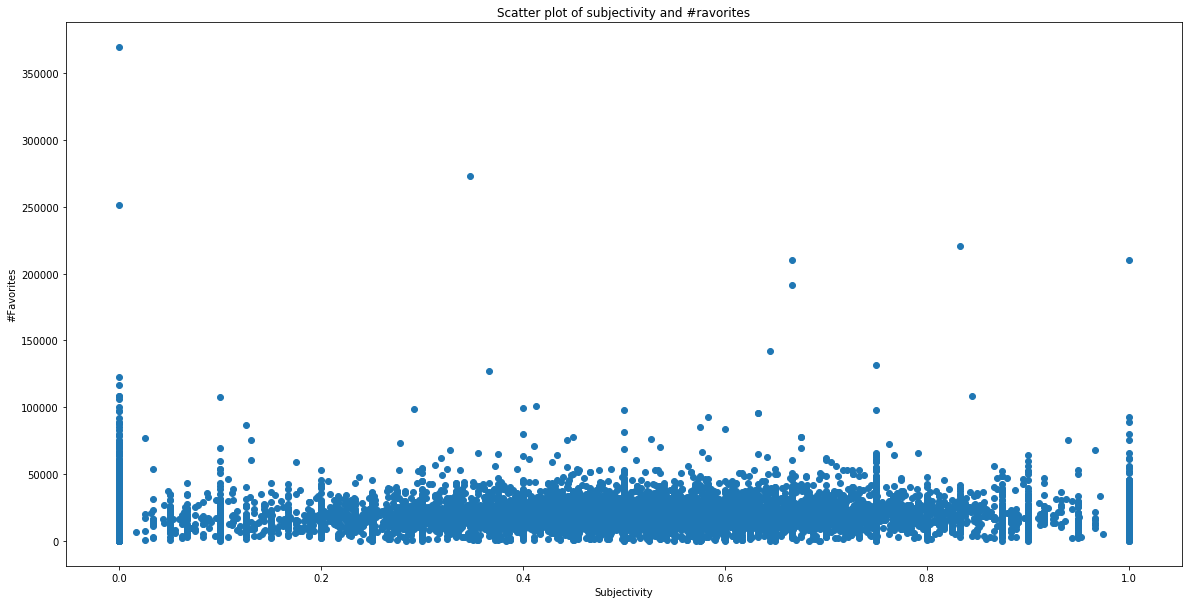

In [71]:

plt.figure(figsize=(20,10)) 

plt.scatter(df['subjectivity'], df['retweet_count'])

plt.xlabel('Subjectivity')
plt.ylabel('#Favorites')
plt.title('Scatter plot of subjectivity and #ravorites')

plt.show()

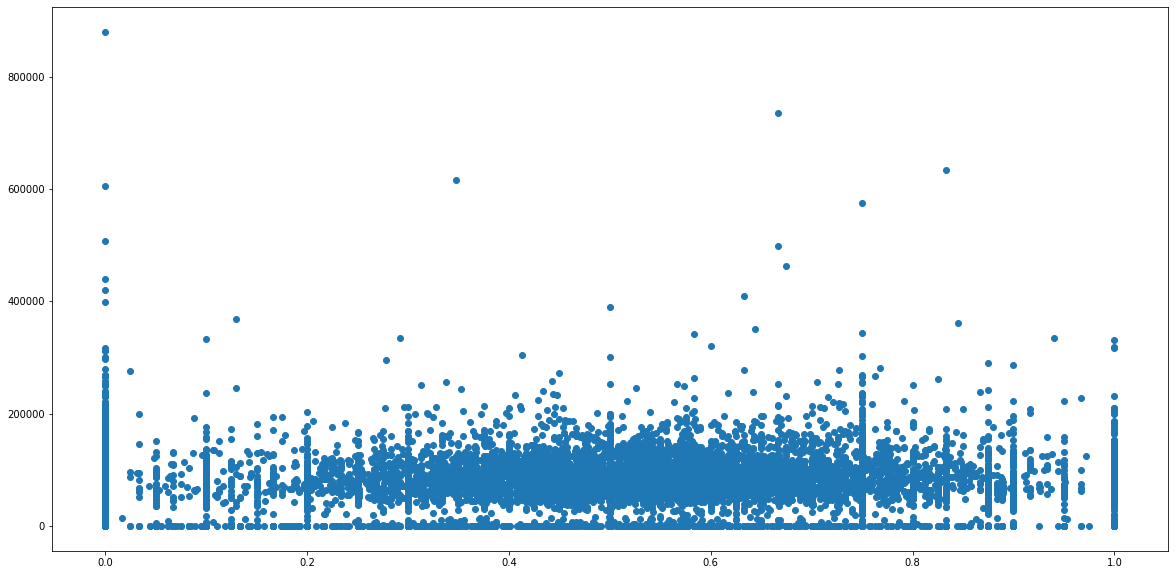

In [25]:

plt.figure(figsize=(20,10)) 

plt.scatter(df['subjectivity'], df['favorite_count'])


In [35]:
neigh_sub = KNeighborsRegressor(n_neighbors=1000)

sub_re = df['subjectivity'].values.reshape(-1,1)

neigh_sub.fit(sub_re, df['favorite_count'])

neigh_pred_sub = neigh_sub.predict(sub_re)


neigh_pol = KNeighborsRegressor(n_neighbors=1000)

pol_re = df['polarity'].values.reshape(-1,1)

neigh_pol.fit(pol_re, df['favorite_count'])

neigh_pred_pol = neigh_pol.predict(pol_re)


# plt.figure(figsize=(20,10)) 

# plt.scatter(df['subjectivity'], df['favorite_count'])

# plt.show()

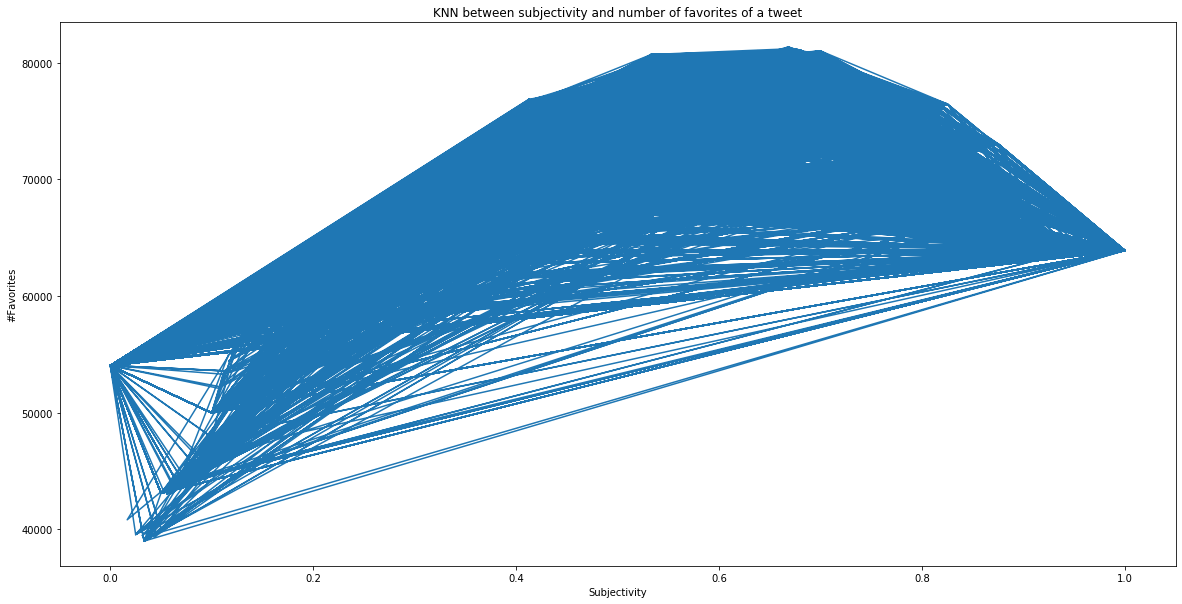

In [39]:
plt.figure(figsize=(20,10)) 

plt.plot(df['subjectivity'], neigh_pred_sub)

plt.xlabel('Subjectivity')
plt.ylabel('#Favorites')
plt.title('KNN between subjectivity and number of favorites of a tweet')

plt.show()


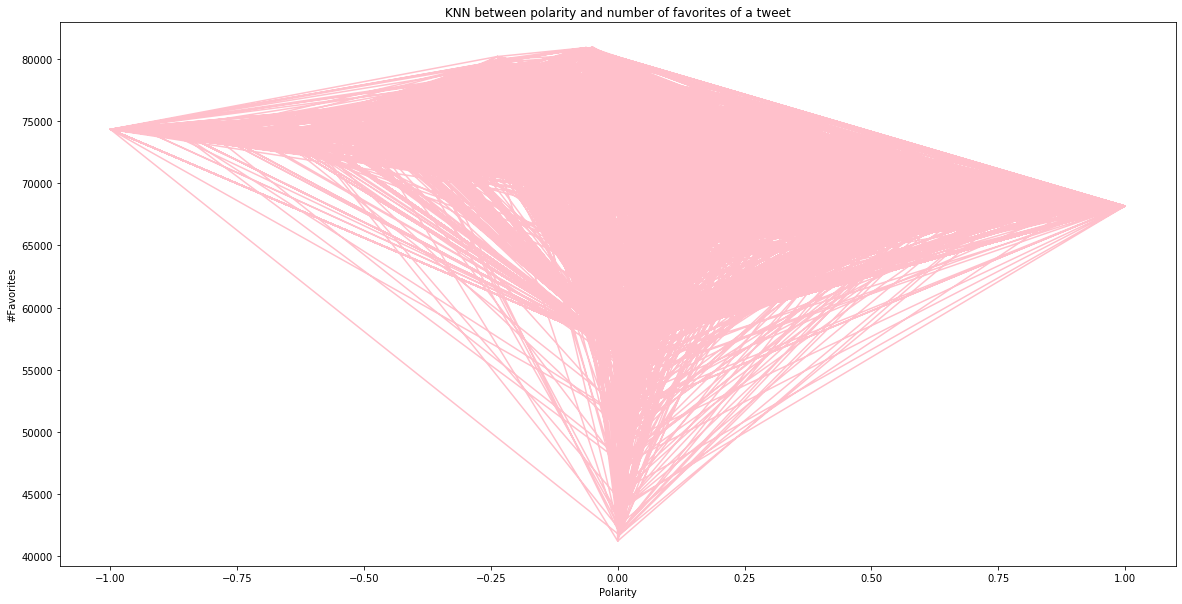

In [73]:
plt.figure(figsize=(20,10)) 

plt.plot(df['polarity'], neigh_pred_pol, color='pink')

plt.xlabel('Polarity')
plt.ylabel('#Favorites')
plt.title('KNN between polarity and number of favorites of a tweet')

plt.show()

In [43]:
neigh_sub_re = KNeighborsRegressor(n_neighbors=1000)

sub_re = df['subjectivity'].values.reshape(-1,1)

neigh_sub_re.fit(sub_re, df['retweet_count'])

neigh_pred_sub_re = neigh_sub_re.predict(sub_re)


neigh_pol_re = KNeighborsRegressor(n_neighbors=1000)

pol_re = df['polarity'].values.reshape(-1,1)

neigh_pol_re.fit(pol_re, df['retweet_count'])

neigh_pred_pol_re = neigh_pol_re.predict(pol_re)



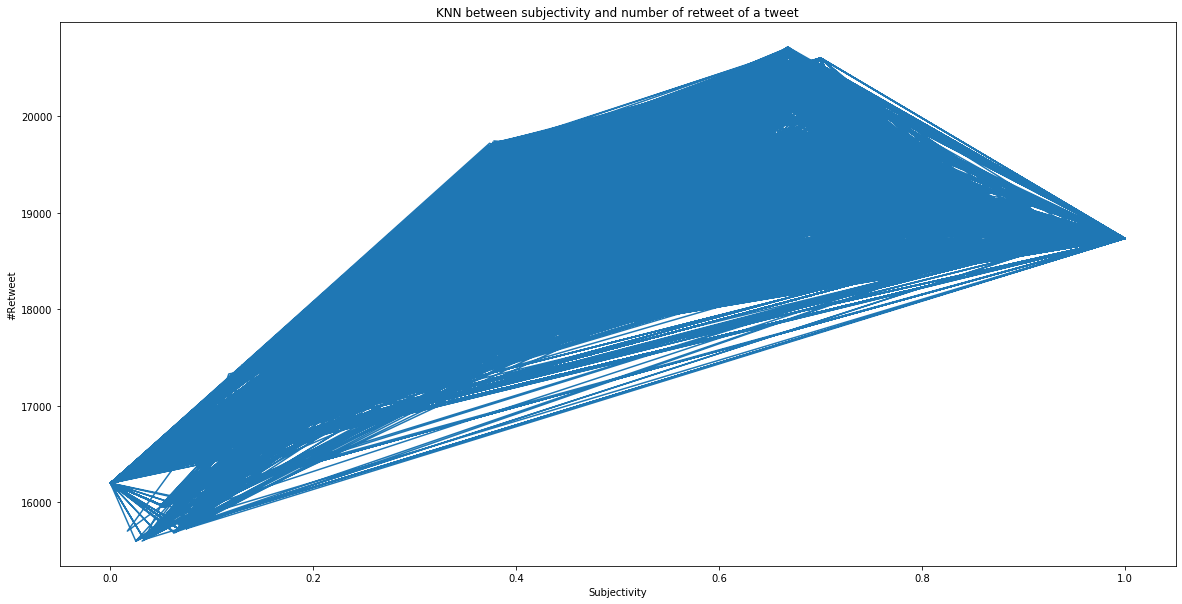

In [72]:

plt.figure(figsize=(20,10)) 

plt.plot(df['subjectivity'], neigh_pred_sub_re)

plt.xlabel('Subjectivity')
plt.ylabel('#Retweet')
plt.title('KNN between subjectivity and number of retweet of a tweet')

plt.show()


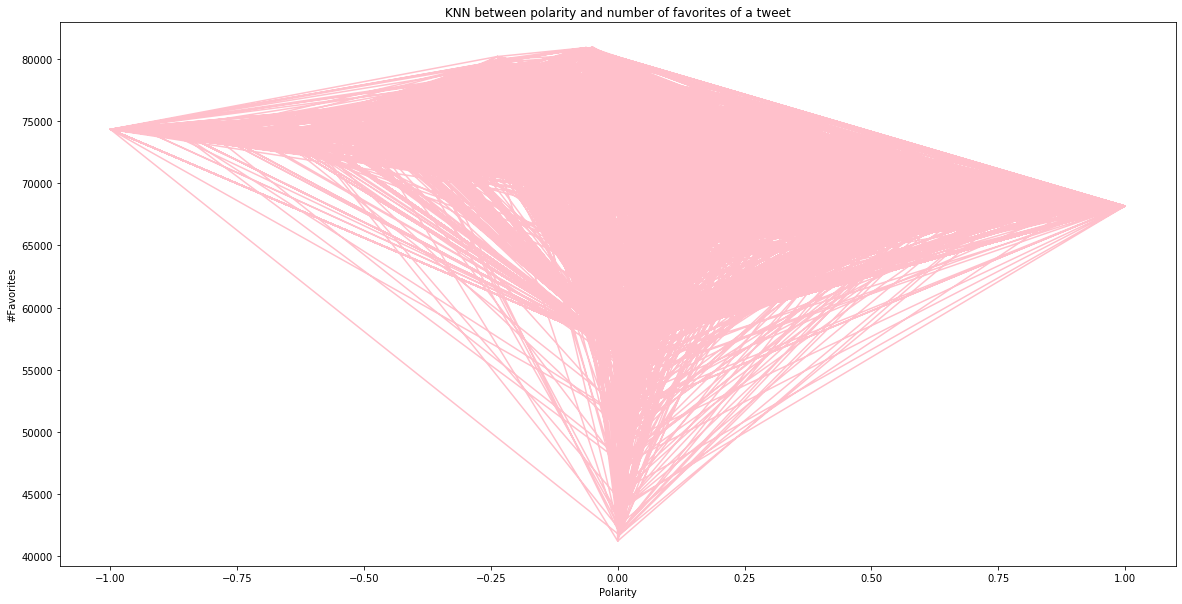

In [47]:
plt.figure(figsize=(20,10)) 

plt.plot(df['polarity'], neigh_pred_pol, color='pink')


plt.xlabel('Polarity')
plt.ylabel('#Favorites')
plt.title('KNN between polarity and number of favorites of a tweet')

plt.show()

In [28]:
df

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,string,polarity,subjectivity
0,Twitter for Android,Such a beautiful and important evening! The fo...,11-09-2016 11:36:58,220796,633253,False,796315640307060738,Such a beautiful and important evening! The fo...,0.450000,0.833333
1,Twitter for iPhone,Happy 241st birthday to the U.S. Marine Corps!...,11-10-2016 19:31:27,45576,169729,False,796797436752707585,Happy 241st birthday to the U.S. Marine Corps!...,1.000000,1.000000
2,Twitter for Android,A fantastic day in D.C. Met with President Oba...,11-11-2016 02:10:46,37788,192638,False,796897928048766976,A fantastic day in D.C. Met with President Oba...,0.580000,0.676667
3,Twitter for Android,Just had a very open and successful presidenti...,11-11-2016 02:19:44,69498,231526,False,796900183955095552,Just had a very open and successful presidenti...,0.009375,0.675000
4,Twitter for Android,Love the fact that the small groups of protest...,11-11-2016 11:14:20,55954,221718,False,797034721075228672,Love the fact that the small groups of protest...,0.410000,0.563333
...,...,...,...,...,...,...,...,...,...,...
12318,Twitter for iPhone,It was just explained to me that for next week...,11-07-2019 15:16:15,17716,59582,False,1192460764235419654,It was just explained to me that for next week...,-0.140625,0.458333
12319,Twitter for iPhone,THANK YOU! #MAGA https://t.co/e6dZshYFMV,11-07-2019 15:18:53,6548,26575,False,1192461425358385154,THANK YOU! #MAGA https://t.co/e6dZshYFMV,0.000000,0.000000
12320,Twitter for iPhone,The Amazon Washington Post and three lowlife r...,11-07-2019 15:27:57,12082,38697,False,1192463709400117250,The Amazon Washington Post and three lowlife r...,-0.116071,0.750000
12321,Twitter for iPhone,The Radical Left Dems and LameStream Media are...,11-07-2019 15:41:53,8318,29340,False,1192467215360102401,The Radical Left Dems and LameStream Media are...,0.169697,0.349053


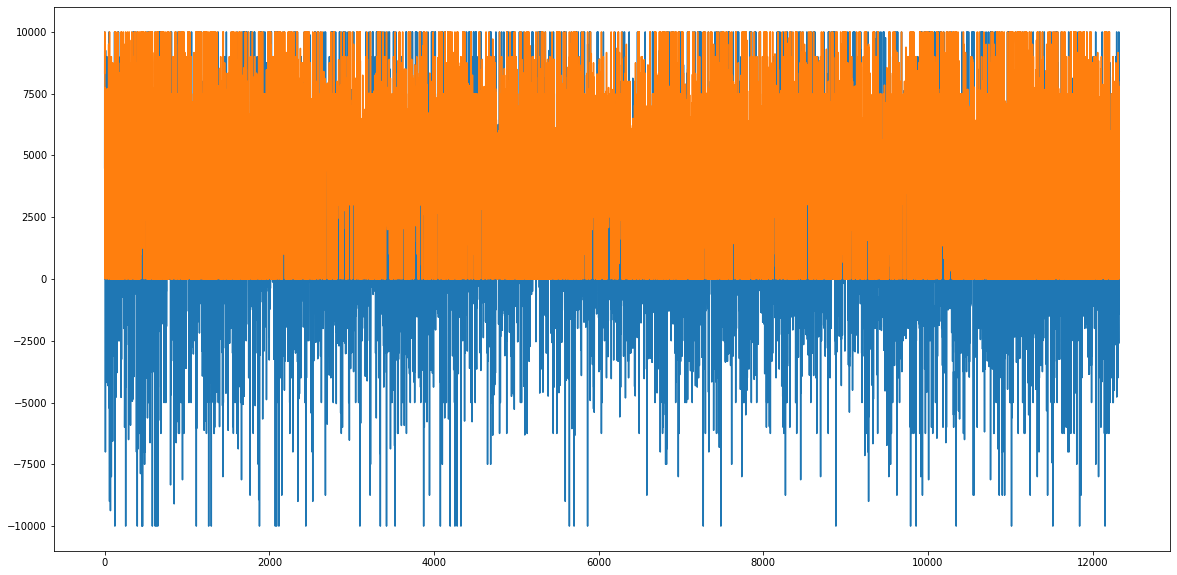

In [29]:
polarity0 = df['polarity'] * 10000
subjectivity0 = df['subjectivity'] * 10000

plt.figure(figsize=(20,10)) 

# plt.plot(favorite)
# plt.plot(retweet2)
plt.plot(polarity0)
plt.plot(subjectivity0)

plt.show()


In [30]:
polarity0

0         4500.000000
1        10000.000000
2         5800.000000
3           93.750000
4         4100.000000
             ...     
12318    -1406.250000
12319        0.000000
12320    -1160.714286
12321     1696.969697
12322     2121.212121
Name: polarity, Length: 12323, dtype: float64

[3591.68936963]
16982.856912810235


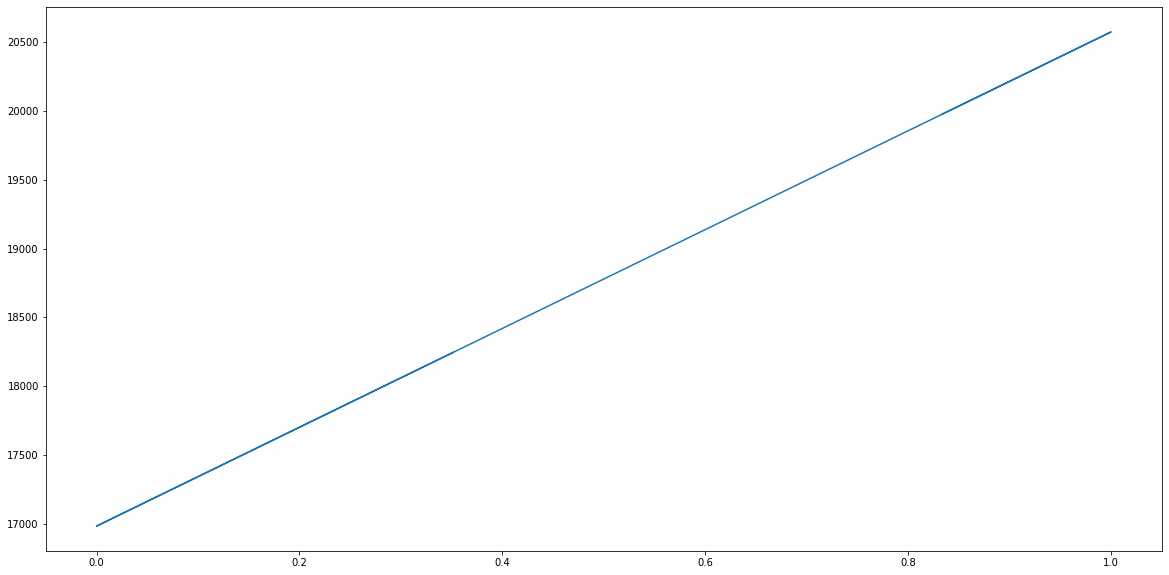

In [31]:
linear = LinearRegression()

subjectivity_reshape = df['subjectivity'].values.reshape(-1,1)

subjectivity_reshape_constant = subjectivity_reshape

linear_model = linear.fit(subjectivity_reshape, retweet)

print (linear_model.coef_)
print (linear_model.intercept_)

y_pred = linear_model.predict(subjectivity_reshape)


plt.figure(figsize=(20,10)) 

plt.plot(subjectivity_reshape, y_pred)
# plt.scatter(subjectivity_reshape, retweet)

plt.show()

(array([2.918e+03, 7.100e+01, 5.400e+01, 1.780e+02, 4.690e+02, 7.220e+02,
        9.080e+02, 1.023e+03, 1.107e+03, 1.001e+03, 8.440e+02, 6.870e+02,
        5.660e+02, 4.150e+02, 3.590e+02, 2.110e+02, 1.780e+02, 1.390e+02,
        1.070e+02, 7.600e+01, 5.700e+01, 4.000e+01, 3.800e+01, 3.200e+01,
        2.100e+01, 1.300e+01, 1.500e+01, 8.000e+00, 1.000e+01, 8.000e+00,
        7.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 1.000e+00,
        4.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

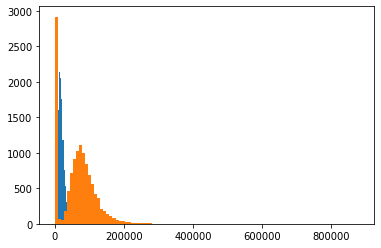

In [32]:
plt.hist(retweet, 100)

plt.hist(favorite, 100)


In [33]:
df2 = df.loc[df['favorite'] == 'foo'])


SyntaxError: invalid syntax (<ipython-input-33-c0e14d94abf6>, line 1)